In [1]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
import networkx as nx
import pprint as pp

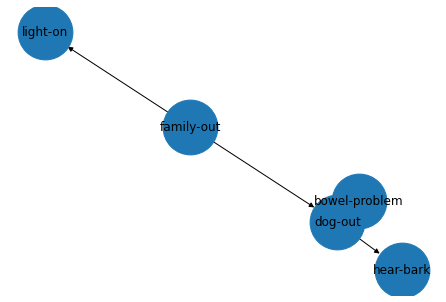

{'bowel-problem':    bowel-problem     p
0          False  0.01
1           True  0.99,
 'dog-out':    family-out  bowel-problem  dog-out     p
0       False          False    False  0.99
1       False          False     True  0.01
2       False           True    False  0.97
3       False           True     True  0.03
4        True          False    False  0.90
5        True          False     True  0.10
6        True           True    False  0.30
7        True           True     True  0.70,
 'family-out':    family-out     p
0       False  0.15
1        True  0.85,
 'hear-bark':    dog-out  hear-bark     p
0    False      False  0.70
1    False       True  0.30
2     True      False  0.01
3     True       True  0.99,
 'light-on':    family-out  light-on     p
0       False     False  0.60
1       False      True  0.40
2        True     False  0.05
3        True      True  0.95}


In [2]:
dog_network = BayesNet()
dog_network.load_from_bifxml('testing/dog_problem.BIFXML')
dog_network.draw_structure()
reasoner = BNReasoner(dog_network)

probs = dog_network.get_all_cpts()
pp.pprint(probs)
# [dog-out], [family-out = True, bowel-problem=False]

**D-Seperation example:**

There is no path between X and Y given Z, therefore it is d-seperated.


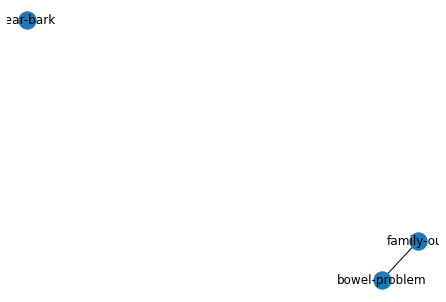

In [3]:
d_sep = reasoner.d_seperation(['family-out'], ['hear-bark'], ['dog-out'])
if d_sep:
    print("There is no path between X and Y given Z, therefore it is d-seperated.")
else:
    print("There is a path between X and Y given Z, therefore it is not guaranteed they are independent of each other .")

**Ordering examples:**

['light-on', 'hear-bark', 'bowel-problem', 'dog-out', 'family-out']
['light-on', 'bowel-problem', 'hear-bark', 'dog-out', 'family-out']


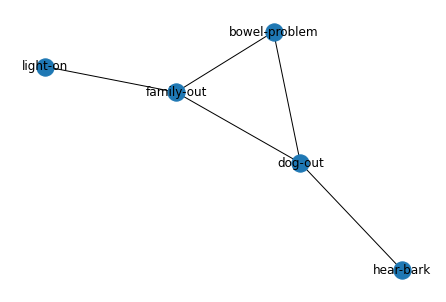

In [4]:
# Min_degree
nx.draw(dog_network.get_interaction_graph(), with_labels=True)
result_min_degree = reasoner.min_degree_order(dog_network.get_all_variables())
print(result_min_degree)
# Min_fill
result_min_fill = reasoner.min_fill_order(dog_network.get_all_variables())
print(result_min_fill)

**Pruning:**

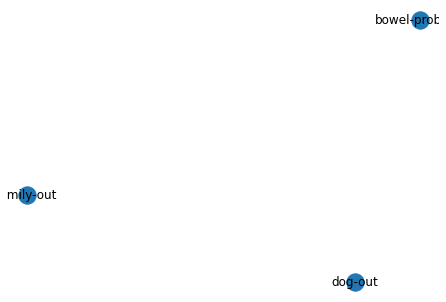

In [5]:
pruned_graph, cpts = reasoner.prune_network(['dog-out'], [('family-out', True), ('bowel-problem', False)])
nx.draw(pruned_graph, with_labels=True)

In [6]:
import random
from BayesNet import BayesNet

def BNgenerator(self, size: int, factor: int, amount: int) -> None:
        # create lists to store nodes(str) and node edges(tuples) in
        nodes = []
        edges = []
        count = 1
        # create random node names based on the size of the BN
        for _ in range(0, size):
            random_node = "node" + str(count)
            count += 1
            nodes.append(random_node)
        # create random connections between nodes
        for node in nodes:
            temp_nodes = nodes.copy()
            temp_nodes.remove(node)
            shuffle_times = random.randrange(1, 4)
            for _ in range(shuffle_times):
                random.shuffle(temp_nodes)
                shuffle_node = temp_nodes[0]
                if node == shuffle_node:
                    continue
                else:
                    edges.append((node, shuffle_node))
                    temp_nodes.remove(shuffle_node)
        connections = {}
        for node1 in nodes:
            for node2 in edges:
                if node1 == node2[0]:
                    if node1 not in connections:
                        connections[node1] = [node2[1]]
                    else:
                        connections[node1].append(node2[1])
        for key, value in connections.items():
            truth_table = BNReasoner.create_empty_truth_table(self, value)
            # truth_table['p'] = df['p'].replace(['NaN','2nd old value',...],['1st new value','2nd new value',...])
            print(truth_table)
        return "Finished"
BNgenerator(10, 10, 10, 10)

   node7  node6 node10    p
0  False  False  False  NaN
1  False  False   True  NaN
2  False   True  False  NaN
3  False   True   True  NaN
4   True  False  False  NaN
5   True  False   True  NaN
6   True   True  False  NaN
7   True   True   True  NaN
   node1  node7  node4    p
0  False  False  False  NaN
1  False  False   True  NaN
2  False   True  False  NaN
3  False   True   True  NaN
4   True  False  False  NaN
5   True  False   True  NaN
6   True   True  False  NaN
7   True   True   True  NaN
   node1    p
0  False  NaN
1   True  NaN
   node7    p
0  False  NaN
1   True  NaN
   node4  node7    p
0  False  False  NaN
1  False   True  NaN
2   True  False  NaN
3   True   True  NaN
   node5  node3    p
0  False  False  NaN
1  False   True  NaN
2   True  False  NaN
3   True   True  NaN
   node4    p
0  False  NaN
1   True  NaN
   node5 node10  node2    p
0  False  False  False  NaN
1  False  False   True  NaN
2  False   True  False  NaN
3  False   True   True  NaN
4   True  False  Fal

'Finished'

0 []
1 []
2 []
3 []
4 [1]
5 []
6 []
7 [2, 3]
8 [2, 6]
9 [3, 5]
10 []
11 []
12 []
13 []
14 [7, 8]
15 [7]
16 []
17 []
18 [2, 5]
19 [0, 7, 15, 17]
20 [2]
21 [13, 19]
22 [2, 10, 11, 12]
23 [4, 14, 16, 19]
24 [5, 12, 20, 22, 23]
25 [1, 11, 12, 14, 23]
26 [2, 7, 25]
27 [16, 21, 25]
28 [5, 21, 22]
29 [1, 19, 20, 28]
30 [2, 24, 29]
31 [0, 13, 15, 23, 27]
32 [5, 8, 11, 17, 21, 25, 31]
33 [10, 26]
34 [10, 14, 28, 29, 32]
35 [1, 3, 9, 16, 18, 19, 24, 26, 32, 34]
36 [13, 14]
37 [13, 32]
38 [3, 11, 20, 25, 26, 34]
39 [26, 36, 38]
40 [1, 11, 16, 17, 31, 37, 38]
41 [0, 21, 22, 31, 32, 39]
42 [8, 16, 20, 21, 24, 25, 26, 28, 32, 33, 38, 39]
43 [7, 12, 18, 23, 39, 40]
44 [7, 10, 12, 24, 25, 26, 33, 39]
45 [13, 15, 20, 21, 31, 35, 37, 42, 44]
46 [0, 9, 17, 31, 33, 40, 42, 45]
47 [5, 23, 24, 27, 30, 35, 43, 45, 46]
48 [0, 9, 31, 32, 42, 46]
49 [1, 2, 4, 6, 21, 30, 36, 39, 41, 44, 46, 47, 48]


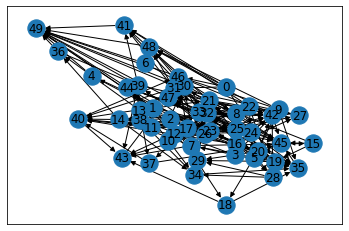

In [16]:
from itertools import combinations, groupby

random_graph = BayesNet()
reasoner = BNReasoner(random_graph)
random_graph.structure.update(reasoner.gnp_random_connected_graph(10, 0.1))

nx.draw_networkx(random_graph.structure, arrows=True)
truth_table = reasoner.set_cpts()
